In [63]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.stattools import adfuller
from pmdarima import auto_arima

In [60]:
df = pd.read_csv('shampoo.csv', parse_dates=True)
df.head()

,Month,Sales
0,1-01,266.0
1,1-02,145.9
2,1-03,183.1
3,1-04,119.3
4,1-05,180.3


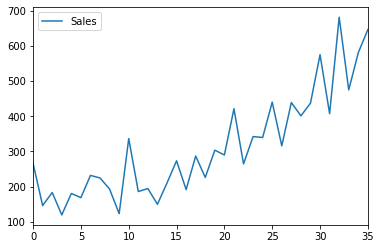

In [61]:
df.plot()

In [13]:
def adf_test(series,title=''):
    print('Augmented Dickey Fuller Test {}'.format(title))
    result = adfuller(series)
    labels = ['ADF test statistic','p-value','# lags used','# observations']
    out = pd.Series(result[0:4],index=labels)
    for key,val in result[4].items():
        out[f'critical value ({key})']=val
    print(out.to_string())
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis")
        print("Reject the null hypothesis")
        print("Data has no unit root and is stationary")
    else:
        print("Weak evidence against the null hypothesis")
        print("Fail to reject the null hypothesis")
        print("Data has a unit root and is non-stationary")

In [14]:
adf_test(df)

Augmented Dickey Fuller Test 
ADF test statistic       3.060142
p-value                  1.000000
# lags used             10.000000
# observations          25.000000
critical value (1%)     -3.723863
critical value (5%)     -2.986489
critical value (10%)    -2.632800
Weak evidence against the null hypothesis
Fail to reject the null hypothesis
Data has a unit root and is non-stationary


In [16]:
df['First Difference']=df['Sales']-df['Sales'].shift(1)

In [17]:
df.head()

,Sales,First Difference
Month,,
1-01,266.0,NaN
1-02,145.9,-120.1
1-03,183.1,37.2
1-04,119.3,-63.8
1-05,180.3,61.0


In [19]:
adf_test(df['First Difference'].dropna())

Augmented Dickey Fuller Test 
ADF test statistic     -7.249074e+00
p-value                 1.799857e-10
# lags used             1.000000e+00
# observations          3.300000e+01
critical value (1%)    -3.646135e+00
critical value (5%)    -2.954127e+00
critical value (10%)   -2.615968e+00
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


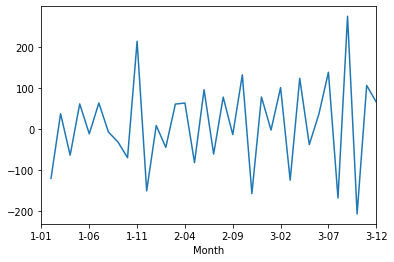

In [20]:
df['First Difference'].plot()

In [31]:
df.shape

(36, 2)

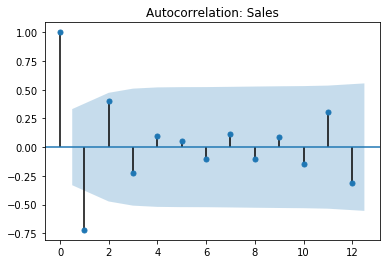

In [43]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

title = 'Autocorrelation: Sales'
lags = 12
plot_acf(df['First Difference'].iloc[1:],title=title,lags=lags);

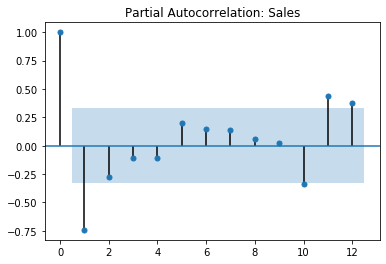

In [44]:
title = 'Partial Autocorrelation: Sales'
lags = 12
plot_pacf(df['First Difference'].iloc[1:],title=title,lags=lags);

In [65]:
stepwise_fit = auto_arima(df['Sales'], start_p=0, start_q=0,
                          max_p=2, max_q=2, m=12,
                          seasonal=False,
                          d=None, trace=True,
                          error_action='ignore',   # we don't want to know if an order does not work
                          suppress_warnings=True,  # we don't want convergence warnings
                          stepwise=True)           # set to stepwise

stepwise_fit.summary()

Performing stepwise search to minimize aic
Fit ARIMA: (0, 1, 0)x(0, 0, 0, 0) (constant=True); AIC=430.873, BIC=433.984, Time=0.497 seconds
Fit ARIMA: (1, 1, 0)x(0, 0, 0, 0) (constant=True); AIC=405.977, BIC=410.643, Time=0.145 seconds
Fit ARIMA: (0, 1, 1)x(0, 0, 0, 0) (constant=True); AIC=408.967, BIC=413.633, Time=0.301 seconds
Fit ARIMA: (0, 1, 0)x(0, 0, 0, 0) (constant=False); AIC=429.229, BIC=430.784, Time=0.022 seconds
Fit ARIMA: (2, 1, 0)x(0, 0, 0, 0) (constant=True); AIC=403.573, BIC=409.794, Time=0.338 seconds
Fit ARIMA: (2, 1, 1)x(0, 0, 0, 0) (constant=True); AIC=404.226, BIC=412.003, Time=0.455 seconds
Fit ARIMA: (1, 1, 1)x(0, 0, 0, 0) (constant=True); AIC=402.407, BIC=408.629, Time=0.377 seconds
Fit ARIMA: (1, 1, 2)x(0, 0, 0, 0) (constant=True); AIC=401.464, BIC=409.241, Time=0.760 seconds
Fit ARIMA: (0, 1, 2)x(0, 0, 0, 0) (constant=True); AIC=399.527, BIC=405.748, Time=0.387 seconds
Near non-invertible roots for order (0, 1, 2)(0, 0, 0, 0); setting score to inf (at least on

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   36
Model:               SARIMAX(0, 1, 2)   Log Likelihood                -195.763
Date:                Thu, 23 Jul 2020   AIC                            399.527
Time:                        10:30:51   BIC                            405.748
Sample:                             0   HQIC                           401.675
                                 - 36                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      9.4561      7.825      1.209      0.227      -5.880      24.792
ma.L1         -1.3227     40.250     -0.033      0.974     -80.210      77.565
ma.L2          0.9996     60.848      0.016      0.987    -118.260     120.259
sigma2      3526.0010   2.14e+05      0.016      0.987   -4.16e+05    4.23e+05
===================================================================================
Ljung-Box (Q):                       36.34   Jarque-Bera (JB):                 0.04
Prob(Q):                              0.36   Prob(JB):                         0.98
Heteroskedasticity (H):               0.84   Skew:                             0.06
Prob(H) (two-sided):                  0.76   Kurtosis:                         2.87
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [66]:
model=ARIMA(df['Sales'],order=(0, 1, 2))
model_fit=model.fit()

In [67]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.Sales   No. Observations:                   35
Model:                 ARIMA(0, 1, 2)   Log Likelihood                -195.803
Method:                       css-mle   S.D. of innovations             61.594
Date:                Thu, 23 Jul 2020   AIC                            399.606
Time:                        10:31:23   BIC                            405.828
Sample:                             1   HQIC                           401.754
                                                                              
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            10.1715      6.423      1.584      0.113      -2.418      22.761
ma.L1.D.Sales    -1.3068      0.164     -7.956      0.000      -1.629      -0.985
ma.L2.D.Sales     0.8950      0.197      4.535      0.000       0.508       1.282
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1            0.7300           -0.7644j            1.0570           -0.1287
MA.2            0.7300           +0.7644j            1.0570            0.1287
-----------------------------------------------------------------------------
"""

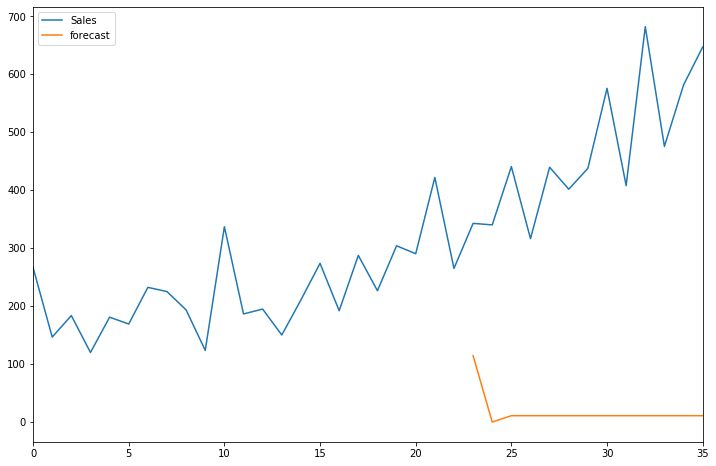

In [68]:
df['forecast']=model_fit.predict(start=23,end=35,dynamic=True)
df[['Sales','forecast']].plot(figsize=(12,8))

In [76]:
df.tail(12)

,Month,Sales,forecast
24,3-01,339.7,-0.789330
25,3-02,440.4,10.171459
26,3-03,315.9,10.171459
27,3-04,439.3,10.171459
28,3-05,401.3,10.171459
29,3-06,437.4,10.171459
30,3-07,575.5,10.171459
31,3-08,407.6,10.171459
32,3-09,682.0,10.171459
33,3-10,475.3,10.171459


In [74]:
from sklearn.metrics import mean_squared_error
mean_squared_error(df['Sales'].iloc[23:], df['forecast'].iloc[23:])

218710.03592573266

In [75]:
from statsmodels.tools.eval_measures import rmse
rmse(df['Sales'].iloc[23:], df['forecast'].iloc[23:])

467.6644480027669